
**Project: Investigate a Dataset 
(No-show Appointments)**

**Prepared by: Apurva Verma**




## Introduction
Table of Contents:

1.Introduction

2.Data Wrangling

3.Exploratory Data Analysis

4.Conclusions


In this project I have investigated a dataset of appoinment records for Brasil public hospitals.The medical appointment dataset contains information on over 100k appointments from the country of Brazil.  The data includes some attributes of patients and state if the patients showed up to appointments.

The original problem description and data set can be found here: https://www.kaggle.com/joniarroba/noshowappointments/home

The analysis is focused on finding trends influencing patients to show or not show up to appointments. The data has been downloaded as csv file and manipulate using pandas, numpy, matplotlib and jupyter notebook. This dataset is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
The questions that can be formulated and answered with the help of this dataset are:

What factors are important to know in order to predict if a patient will show up for their scheduled appointment?
What is the overall status of patients attendances to appointments?
What is the gender distribution for show / no-show patients?
What is the patient age distribution of no-shows versus shows?
What is the patient health designat

In [7]:
#import the packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns




## Data Wrangling

After having a look of the dataset and proposed questions for the analysis we will be keeping only relevent data deleting the unwanted data so that we can make our calculation easy and understandable.


### General Properties
First, I'll load the data and get simple information by performing certain operations.

In [8]:
#Load noshowappointments.csv file
df= pd.read_csv('noshowappointments.csv')
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812460e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [11]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [12]:
df.shape

(110527, 14)



### Data Cleaning 
Now as we have assessed the data it's time to fix some issue regarding it.

There are multiple issues that need to be fixed in this dataset:

1. The naming machnisem of the columns and spelling need to get fixed.
2.Columns 'AppointmentDay' and 'ScheduledDay' should be converted from objects to datetime for consistency.
3. Column 'Age' also has some erroneous values (-1 and 115).
3. The features should be all in lowercase.
4. The spaces should be replaced it by underscore '_'.
5.'Handcap' has a max value of 4.
5. There is no need for filterazation, drop nulls (missing values) or drop duplicates since they are DNE! 
6. Column 'PatientId' should be converted from float to integer.


In [13]:
#remaning columns
df.rename(columns={'Hipertension':'HyperTension','Handcap':'Handicap','No-show':'No_show'},inplace=True)

In [14]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'HyperTension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')

In [15]:
#To convert dates to date_time datatype
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['PatientId'] = df['PatientId'].astype('int64')
df.head(1)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,HyperTension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872500000000,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [16]:
# replace spaces with underscores and lowercase labels
df.rename(columns=lambda x:x.strip().lower().replace(" ", "_"), inplace=True)

#confirm changes
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872500000000,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [17]:
#Checking for null values
df.isnull().sum()

patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hypertension      0
diabetes          0
alcoholism        0
handicap          0
sms_received      0
no_show           0
dtype: int64

In [18]:
# Checking for Depuced Data
print(df.duplicated().sum())

0


In [19]:
df['age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

In [20]:
#While we knew that the age range had unreasonable and inaccurate values, we checked to see how many rows would be affected. 
#The number of rows affected were minimal so the decision was made to remove those rows from the dataframe.
df = df[(df.age >= 0) & (df.age <= 100)]
df['age'].value_counts()


0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
96       17
97       11
98        6
100       4
99        1
Name: age, Length: 101, dtype: int64

In [21]:
#Check values stored in Handicap and the total of those values.
df['handicap'].value_counts()


0    108282
1      2038
2       183
3        13
4         3
Name: handicap, dtype: int64

In [22]:

#removing Handicap from the dataframe
df.drop(['handicap'], axis=1, inplace=True)
df.head()


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show
0,29872500000000,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,No
1,558998000000000,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,No
2,4262960000000,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,No
3,867951000000,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,8841190000000,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,No


We are introducing new columns here In order to measure the affect of wait-time.
An additional column Days was added to calculate the days a patient waited for an appointment.!

+ Add new columns called 'elapsed_days' that take the difference between the 'scheduled_day' and 'appointment_day'
+ Add new columns called 'scheduled_dayofweek'
+ Add new columns called 'scheduled_hours'
+ Add new columns called 'appointment_dayofweek'
+ Add new columns called 'age_range'

In [23]:
df.shape

(110519, 13)

In [24]:
df_v1 = df
#  total days a patient will wait for their appointment and put it in a new column
df_v1['elapsed_days'] = df_v1['appointmentday'] - df_v1['scheduledday']
df_v1['elapsed_days'] = df_v1['elapsed_days'].dt.days

# extract the appointment days and put it in a new colmun
df_v1['appointment_wday'] = df_v1['appointmentday'].dt.day

# extract the scheduled days and put it in a new colmun
df_v1['scheduled_wday'] = df_v1['scheduledday'].dt.day

# extract the scheduled hours and put that in a new column
df_v1['scheduled_hour'] = df_v1['scheduledday'].apply(lambda time: time.hour)

# extract the numerical ages and put it into categrise range
df_v1['age_range'] = pd.qcut(df_v1.age, 4, labels=["child","young","adult","aged"])

# saperate the no-show column into two different columns
df_v1 = pd.concat([df_v1, pd.get_dummies(df_v1['no_show'],prefix='no_show')], axis=1); 

# saperate the no-show column into two different columns
df_v1 = pd.concat([df_v1, pd.get_dummies(df_v1['sms_received'],prefix='sms_received')], axis=1); 
df_v1.rename(columns={'sms_received_0':'sms_received_no', 'sms_received_1':'sms_received_yes'},inplace=True);

df_v1.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,...,no_show,elapsed_days,appointment_wday,scheduled_wday,scheduled_hour,age_range,no_show_No,no_show_Yes,sms_received_no,sms_received_yes
0,29872500000000,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,...,No,-1,29,29,18,aged,1,0,1,0
1,558998000000000,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,...,No,-1,29,29,16,aged,1,0,1,0
2,4262960000000,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,...,No,-1,29,29,16,aged,1,0,1,0
3,867951000000,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,...,No,-1,29,29,17,child,1,0,1,0
4,8841190000000,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,...,No,-1,29,29,16,aged,1,0,1,0


In [25]:
 #Get a transpose of dataframe for better understanding
 df_v1.T

,0,1,2,3,4,5,6,7,8,9,...,110517,110518,110519,110520,110521,110522,110523,110524,110525,110526
patientid,29872500000000,558998000000000,4262960000000,867951000000,8841190000000,95985100000000,733688000000000,3449830000000,56394700000000,78124600000000,...,5574940000000,72633100000000,65423900000000,996998000000000,36355300000000,2572130000000,3596270000000,15576600000000,92134900000000,377512000000000
appointmentid,5642903,5642503,5642549,5642828,5642494,5626772,5630279,5630575,5638447,5629123,...,5780122,5630375,5630447,5650534,5651072,5651768,5650093,5630692,5630323,5629448
gender,F,M,F,F,F,F,F,F,F,F,...,F,F,F,F,F,F,F,F,F,F
scheduledday,2016-04-29 18:38:08+00:00,2016-04-29 16:08:27+00:00,2016-04-29 16:19:04+00:00,2016-04-29 17:29:31+00:00,2016-04-29 16:07:23+00:00,2016-04-27 08:36:51+00:00,2016-04-27 15:05:12+00:00,2016-04-27 15:39:58+00:00,2016-04-29 08:02:16+00:00,2016-04-27 12:48:25+00:00,...,2016-06-07 07:38:34+00:00,2016-04-27 15:15:06+00:00,2016-04-27 15:23:14+00:00,2016-05-03 07:51:47+00:00,2016-05-03 08:23:40+00:00,2016-05-03 09:15:35+00:00,2016-05-03 07:27:33+00:00,2016-04-27 16:03:52+00:00,2016-04-27 15:09:23+00:00,2016-04-27 13:30:56+00:00
appointmentday,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,...,2016-06-07 00:00:00+00:00,2016-06-07 00:00:00+00:00,2016-06-07 00:00:00+00:00,2016-06-07 00:00:00+00:00,2016-06-07 00:00:00+00:00,2016-06-07 00:00:00+00:00,2016-06-07 00:00:00+00:00,2016-06-07 00:00:00+00:00,2016-06-07 00:00:00+00:00,2016-06-07 00:00:00+00:00
age,62,56,62,8,56,76,23,39,21,19,...,19,50,22,42,53,56,51,21,38,54
neighbourhood,JARDIM DA PENHA,JARDIM DA PENHA,MATA DA PRAIA,PONTAL DE CAMBURI,JARDIM DA PENHA,REPÚBLICA,GOIABEIRAS,GOIABEIRAS,ANDORINHAS,CONQUISTA,...,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ
scholarship,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hypertension,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
diabetes,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df_v1.dtypes

patientid                         int64
appointmentid                     int64
gender                           object
scheduledday        datetime64[ns, UTC]
appointmentday      datetime64[ns, UTC]
age                               int64
neighbourhood                    object
scholarship                       int64
hypertension                      int64
diabetes                          int64
alcoholism                        int64
sms_received                      int64
no_show                          object
elapsed_days                      int64
appointment_wday                  int64
scheduled_wday                    int64
scheduled_hour                    int64
age_range                      category
no_show_No                        uint8
no_show_Yes                       uint8
sms_received_no                   uint8
sms_received_yes                  uint8
dtype: object

In [27]:
# save final CLEAN dataset as new file
df_v1.to_csv('no_show_data_clean.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

Now the data has been cleaned and ready to be visualized. Data is more consistent and reliable to get output from and guide us to our analysis..

### Research Question 1  :Important factors to  predict if a patient will show up for their scheduled appointment or not.

In [53]:

df_clean = pd.read_csv('no_show_data_clean.csv')

In [54]:
# Function to calculate percentage
def percentage(amount,total):
    return (amount / total) * 100

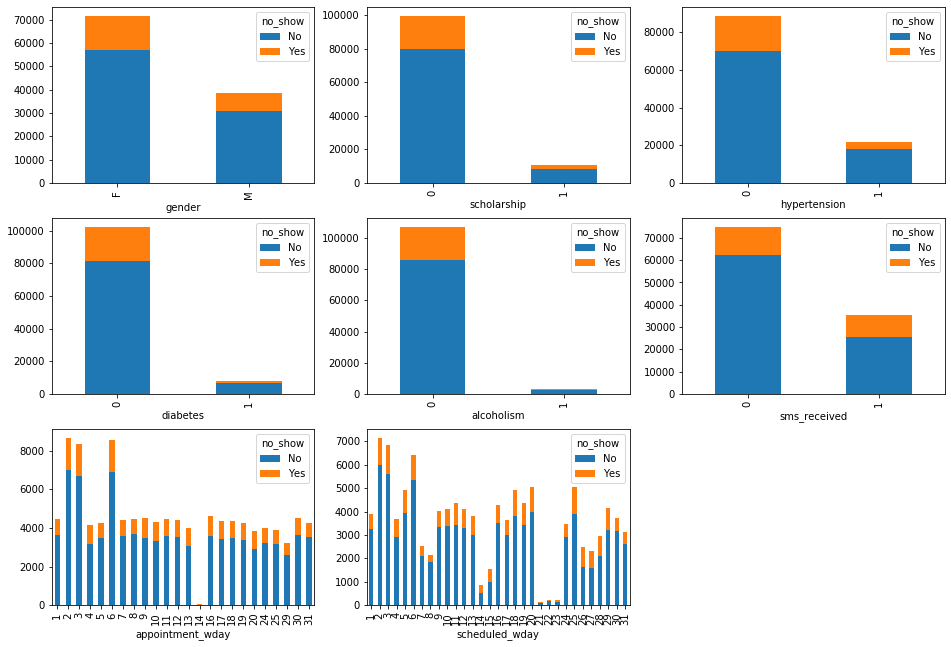

In [55]:
# Look at categorical variables
c_vars = ['gender', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'sms_received', 'appointment_wday', 'scheduled_wday']

fig = plt.figure(figsize=(16, 11))
for i, var in enumerate(c_vars):
    ax = fig.add_subplot(3, 3, i+1)
    df_clean.groupby([var, 'no_show'])[var].count().unstack('no_show').plot(ax=ax, kind='bar', stacked=True)


**Concluison**: For all categorical variables the distributions of show or no-show for different categories look very similar. There is no clear indication of any of these variables having bigger then others impact on show / no-show characteristics. The charts confirm about 20% no-show rate for most categories.

**Research Question 2 : What is the patient health designation breakdown of no-shows versus shows?**



In [56]:
# filter by no-shown appointments and health profile
hypertension_data = df_clean.groupby('hypertension').no_show.value_counts()
diabetes_data = df_clean.groupby('diabetes').no_show.value_counts()
alcoholism_data = df_clean.groupby('alcoholism').no_show.value_counts()
hypertension_data, diabetes_data, alcoholism_data

(hypertension  no_show
 0             No         70175
               Yes        18544
 1             No         18028
               Yes         3772
 Name: no_show, dtype: int64,
 diabetes  no_show
 0         No         81690
           Yes        20886
 1         No          6513
           Yes         1430
 Name: no_show, dtype: int64,
 alcoholism  no_show
 0           No         85520
             Yes        21639
 1           No          2683
             Yes          677
 Name: no_show, dtype: int64)

In [57]:
# b = missed_ratio(df_clean, 'diabetes', 0)
# c = missed_ratio(df_clean, 'alcoholism', 0)

# explore the trends  and calculate the percentages of patients of no-shown appointments
ns_yes_df = df_clean.query('no_show == "Yes"')
ns_percentages = []
def print_no_show_health_stats(value, h_type):
    percent = ((value/len(ns_yes_df.index)) * 100).round(2)
    ns_percentages.append([h_type, percent])
    print("{} patients i.e, {}% who didn't show up to appointment are associated with {}\n".format(
        value, percent, h_type))
    
print_no_show_health_stats(hypertension_data[1]['Yes'], 'hypertension')
print_no_show_health_stats(diabetes_data[1]['Yes'], 'diabetes')
print_no_show_health_stats(alcoholism_data[1]['Yes'], 'alcoholism')

3772 patients i.e, 16.9% who didn't show up to appointment are associated with hypertension

1430 patients i.e, 6.41% who didn't show up to appointment are associated with diabetes

677 patients i.e, 3.03% who didn't show up to appointment are associated with alcoholism



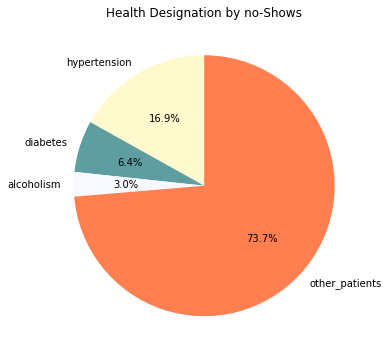

In [58]:
# # The plot
# labels = ['Hypertension', 'Diabetes', 'Alcoholism']
# sizes = [a, b, c]
# colors = ['lightgreen', 'lightblue', 'aquamarine']
# explode = (0, 0, 0.1)

# plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#         autopct='%1.1f%%', shadow=True, startangle=140)

# plt.title('Health Designation by Shows')
# plt.axis('equal')
# fig = plt.gcf()
# fig.set_size_inches(5,5);

# plot a chart of health profile stats of no-shows
other_patients = 100 - (ns_percentages[0][1] + ns_percentages[1][1] + ns_percentages[2][1])
values = [ns_percentages[0][1], ns_percentages[1][1], ns_percentages[2][1], other_patients]
labels = ['hypertension', 'diabetes', 'alcoholism', 'other_patients']
colors = ['lemonchiffon', 'cadetblue', 'ghostwhite', 'coral']
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Health Designation by no-Shows') 
fig = plt.gcf()
fig.set_size_inches(6,6);

In [59]:
# explore the trends  and calculate the percentages of patients of shown appointments
ns_no_df = df_clean.query('no_show == "No"')
s_percentages = []
def print_show_health_stats(value, h_type):
    percent = ((value/len(ns_no_df.index)) * 100).round(2)
    s_percentages.append([h_type, percent])
    print("{} patients i.e, {}% who showed up to appointment are associated with {}\n".format(value, percent, h_type))
    
print_show_health_stats(hypertension_data[1]['No'], 'hypertension')
print_show_health_stats(diabetes_data[1]['No'], 'diabetes')
print_show_health_stats(alcoholism_data[1]['No'], 'alcoholism')

18028 patients i.e, 20.44% who showed up to appointment are associated with hypertension

6513 patients i.e, 7.38% who showed up to appointment are associated with diabetes

2683 patients i.e, 3.04% who showed up to appointment are associated with alcoholism



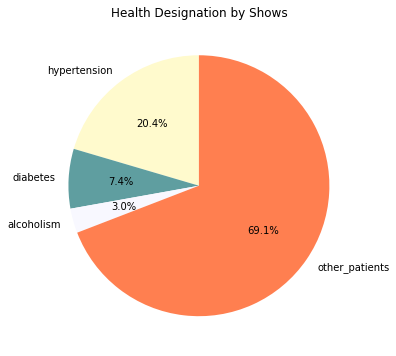

In [60]:
# plot a chart of health profile stats of no-shows
other_patients = 100 - (s_percentages[0][1] + s_percentages[1][1] + s_percentages[2][1])
values = [s_percentages[0][1], s_percentages[1][1], s_percentages[2][1], other_patients]
labels = ['hypertension', 'diabetes', 'alcoholism', 'other_patients']
colors = ['lemonchiffon', 'cadetblue', 'ghostwhite', 'coral']
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Health Designation by Shows') 
fig = plt.gcf()
fig.set_size_inches(6,6);


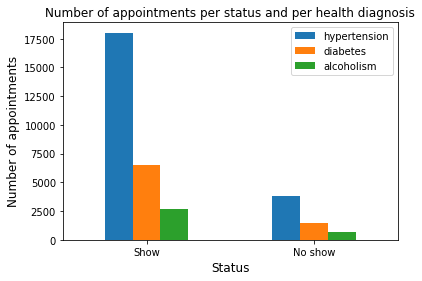

In [61]:
ax = df_clean.groupby('no_show').sum()[['hypertension','diabetes','alcoholism']].plot(kind='bar');
ax.set_xlabel("Status",fontsize=12);
ax.set_ylabel("Number of appointments",fontsize=12);
ax.set_xticklabels(['Show',"No show"], rotation=0);
plt.title('Number of appointments per status and per health diagnosis')
plt.show();

Conclusion: The patients with hypertension are more likely to not show up than diabetic patients and diabetic patients are more likely to not show up than alcoholic patients. The health profile of patients doesn’t seem to have much influence on showing up to appointment or not. Patients with hypertension have 16.9% no-show rate and 20% show rate which is not a significant difference. Similarly with alcoholism and diabetes, their proportions doesn’t seem to vary significantly.

**Research Question 3**: patient age distribution of no-shows versus shows.

In [62]:
#Function 
def missed_ratio(dataframe, feature, value):
    all_appoints = len(dataframe.loc[dataframe[feature] == value])
    missid_appoints = len(dataframe.loc[(dataframe[feature] == value) & (df_clean['no_show'] == "Yes")])
    return (missid_appoints / all_appoints) * 100

In [63]:

df_clean.age_range.unique()

array(['aged', 'child', 'young', 'adult'], dtype=object)

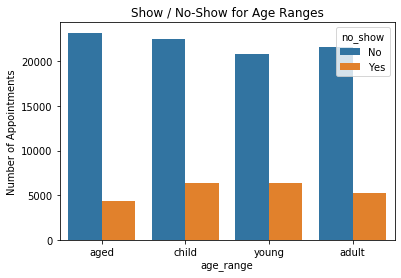

In [64]:
missed_ratio(df_clean,'age_range', "child")
missed_ratio(df_clean, 'age_range', "young")
missed_ratio(df_clean, 'age_range', "adult")
missed_ratio(df_clean, 'age_range', "aged")



ax = sns.countplot(x=df_clean.age_range, hue=df_clean.no_show, data=df_clean)
ax.set_title("Show / No-Show for Age Ranges")
ax.set_ylabel("Number of Appointments");
x_ticks_labels=['Child', 'Young', 'Adult', 'Aged']
plt.show();


**Concluison**: The distribution is skewed towards aged then child. Though aged and child are likely to show up to their appointments.

**Research Question 4**: people receiving SMS are more likely to show up?


In [65]:
# group by sms_received and count the shows and no shows
sms_data = df.groupby('sms_received').no_show.value_counts()
sms_data

sms_received  no_show
0             No         62506
              Yes        12532
1             No         25697
              Yes         9784
Name: no_show, dtype: int64

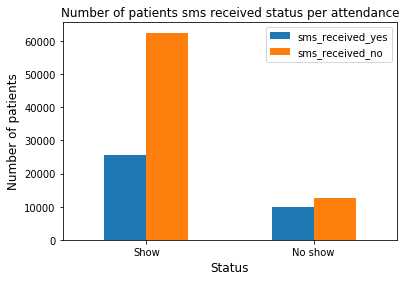

In [66]:
ax = df_clean.groupby('no_show_Yes').sum()[['sms_received_yes','sms_received_no']].plot(kind='bar');
ax.set_xlabel("Status",fontsize=12);
ax.set_ylabel("Number of patients",fontsize=12);
ax.set_xticklabels(['Show',"No show"], rotation=0);
plt.title('Number of patients sms received status per attendance')
plt.show();


**Conclusion**: Sending SMS is not a major factor that is influencing the percentage of no-shows because patients without receiving SMS showed up to the appointment in a great proportion.
Therefore, SMS hardly has an effect on no-shows.

**Research Question 5**: Do no-shows have a larger time gap between scheduled date and appointment date?

In [67]:
# check for elapsed_days column 
df_clean.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,...,no_show,elapsed_days,appointment_wday,scheduled_wday,scheduled_hour,age_range,no_show_No,no_show_Yes,sms_received_no,sms_received_yes
0,29872500000000,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,...,No,-1,29,29,18,aged,1,0,1,0


In [68]:
# calculate the amount of diffrence between appointment and scheduled day and drop the incorrect data
days_between_df = df_clean.drop(df_clean.index[df_clean['elapsed_days'] < 0])
days_between_df = days_between_df[['no_show', 'elapsed_days']].groupby('elapsed_days').count()

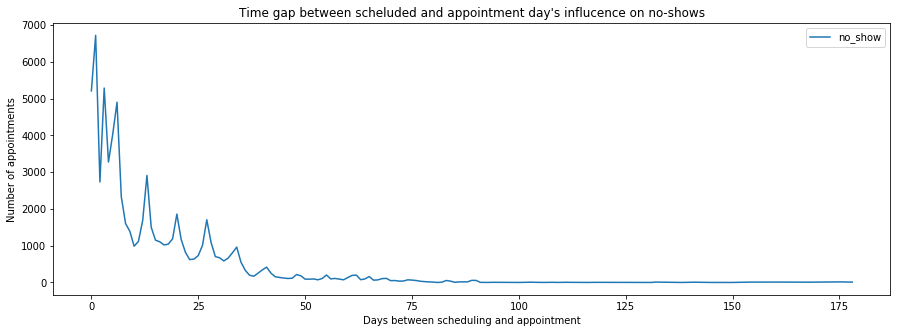

In [69]:
days_between_df.plot(kind='line', figsize=(15,5));
plt.title("Time gap between scheluded and appointment day's influcence on no-shows");
plt.xlabel('Days between scheduling and appointment');
plt.ylabel('Number of appointments');


**Conclusion**: Patients are a lot more likely to show up when the appointment is scheduled on the same day.

**Research Question**: What is the gender distribution for show / no-show patients?

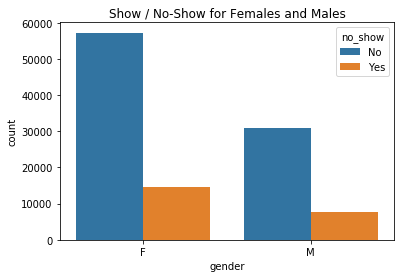

In [70]:
missed_ratio(df_clean, 'gender', "F")
missed_ratio(df_clean,'gender', "M")


ax = sns.countplot(x=df_clean.gender, hue=df_clean.no_show, data=df_clean)
ax.set_title("Show / No-Show for Females and Males")
x_ticks_labels=['Female', 'Male']
plt.show();


**Concluison**: The distribution is skewed towards women. Though women are likely to show up to their appointment, the no-shows percent of both male and women doesn’t vary too much. Apparently, gender has no influence on proportion of no-shows.

**Research Question 6**:  overall status of patients attendances to appointments?

In [71]:
df_no_show_yes = df_clean.query('no_show == "Yes"')
df_no_show_no = df_clean.query('no_show == "No"')

num_no_show_yes = df_no_show_yes['no_show'].value_counts()[0]
num_no_show_no = df_no_show_no['no_show'].value_counts()[0]


no_show_yes_percentage = round((num_no_show_yes/df_clean['no_show'].count())*100,2)
no_show_no_percentage = round((num_no_show_no/df_clean['no_show'].count())*100,2)

print('Percentage of appointments have not been attending by patients: {}%'.format(no_show_yes_percentage))
print('Percentage of appointments have been attending by patients: {}%'.format(no_show_no_percentage))

Percentage of appointments have not been attending by patients: 20.19%
Percentage of appointments have been attending by patients: 79.81%


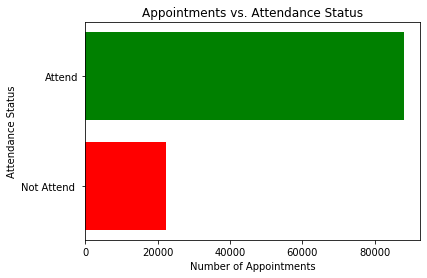

In [72]:
labels = ["Not Attend ","Attend"]
numOfAppoints = [num_no_show_yes, num_no_show_no]

#plot bars chart with x tick label
plt.barh(labels, numOfAppoints, color=['red', 'green'], tick_label=labels);
plt.ylabel("Attendance Status");
plt.xlabel("Number of Appointments");
plt.title("Appointments vs. Attendance Status");

<a id='conclusions'></a>
## Conclusions
The visualization of data helped us to draw significant conclusion as nearly 80% of all appointments investigated were no-shows. This number was the root driver of the analysis. 


The following conclusions were drawn to serve as a basis for a more robust analysis in the future:
1. Charts confirm about 20% no-show rate for most categories.
2. Patient age distribution of no-shows versus shows.
4. The distribution is skewed towards aged then child. Though aged and child are likely to show up to their appointments.
5. SMS hardly has an effect on no-shows.
6. Patients are a lot more likely to show up when the appointment is scheduled on the same day.


**LIMITATIONS**
1.Data for a longer timeframe would provide insight into how seasonality and holidays impact show rates.

2.Location of neighbouthood of the hospitals cannot strengthen our analysis due to limitation of the information set of the data.

3.Selected deseases are mentioned in the data which should have been more elaborated and common disease like flu etc should be menitoned.

4.The patients who recieve SMS miss their appointment often. Now we cannot get to the exact cause of this scenario due to limitation of the data set as it does not discss to whom the sms are sent like is it for older people, for premium clients , or for those who require special medical attention etc.

5.Overlaying external data sources onto this data set such as traffic, weather, or geographic data could allow us to better understand influencers on no-show rates.

This data set do not provide sufficent information to derive the exact reason behind the behaviour of the patients towards attending or missing the appointment.




**References:**

Numpy Documentation 

Stack Overflow

MatplotLib Documenation 
